소개 2005년부터 2018년까지 수년간 한국 정부로부터 자료를 제공받았습니다 이는 가계 통계와 그들의 수입에 대한 많은 정보를 담고 있으며 데이터 셋에 담긴 콘텐츠들을 다음과 같이 분류할 수 있습니다

ID

연도: 실시한 조사

wave: 2005년 제1파부터 2018년 제14파까지

지역:1)서울2)경기3)경남4)경북5)충남6)강원용충북7)전라제주

소득 : 연간 소득 (백만원. 1100원 = 1달러)

family_member : 가족구성원 수

성별 : 1) 남성 2) 여성

태어난 해

교육 수준: 1) 교육 없음 (7세 미만) 2) 교육 없음 (7세 이상) 3) 초등학교 4) 중학교 5) 고등학교 6) 대학교 8) 석사 9) 박사학위

혼인: 혼인 관계 1) 해당되지 않는다(18세미만)2)기혼3)사별 4)미혼6)기타

종교: 1) 종교가 있다 2) 종교가 없다

직업: 이것은 다른 코드 북으로 제공됩니다.

회사_사이즈

이유 없음 노동자: 1) 능력 없음 2) 병역의무 없음 3) 학교에서 공부하다 4) 학교에서 공부하다 5) 취업준비 6) 가사노동자 7) 집에서 돌보다 8) 간호 9) 경제활동을 포기하다 10) 일할 의사 없음 11) 기타

분석을 통해 데이터가 시각적으로 어떻게 제시되는지를 살펴보고 이 데이터에서 끌어낼 수 있는 흥미로운 사실이 있는지 여부를 판단합니다.

# 목표                                                                                                    
 1.데이터 전처리 및 여러 가지의 차트 및 시각화를 구현해 보면서 EDA 분석을 면밀히 수행해보자!                                                            
          2.Korea_Income_and_Welfare의 개개인의 Income,Welfare 관련 정보를 나타내는 컬럼들을 통해 그 사람의 출신지(region)를 예측해보자! ( 다수의 알고리즘 활용)

In [6]:
# import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# from collections import Counter
# from nltk import WhitespaceTokenizer
# import urllib
# from wordcloud import WordCloud

In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
#mpl.rc('font', family='AppleGothic') #맥
mpl.rcParams['axes.unicode_minus'] = False

전체적인 데이터 셋의 정보와 직업의 정의를 데이터 프레임에 로딩합니다. 작업 타이틀은 분석에 사용되지 않지만 데이터를 시각화하기 쉽도록 데이터 세트에 추가됩니다.

In [10]:
# 데이터 읽기
#df = pd.read_csv(r'\Users\project\dataAnalysis-project\JYS\3.EDA\Korea_Income_and_Welfare.csv', index_col=0, encoding='UTF8')
wf = pd.read_csv(r'\Users\project_Sjy\JYS\3.EDA\Korea_Income_and_Welfare.csv', index_col=0, encoding='UTF8')
print(wf.shape)
wf.head(10)

(92857, 13)


,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
id,,,,,,,,,,,,,
10101,2005,1,1,614.000000,1,2,1936,2,2,2,,,8
10101,2011,7,1,896.000000,1,2,1936,2,2,2,,,10
10101,2012,8,1,1310.000000,1,2,1936,2,2,2,,,10
10101,2013,9,1,2208.000000,1,2,1936,2,2,2,,,1
10101,2014,10,1,864.000000,1,2,1936,2,2,2,,,10
10101,2015,11,1,1171.000000,1,2,1936,2,2,1,,,10
10101,2016,12,1,1643.000000,1,2,1936,2,2,2,,,10
10101,2017,13,1,851.000000,1,2,1936,2,2,2,,,10
20101,2005,1,1,1257.000000,1,2,1945,4,2,2,421,1,


분석에 필요한 것은 작업 코드와 타이틀뿐입니다. 데이터를 깨끗하게 유지하기 위해 처음 두 개의 컬럼을 드롭할 수 있습니다.

In [11]:
#!pip install openpyxl

In [12]:
job_check = pd.read_excel(r'\Users\project_Sjy\JYS\3.EDA\job_code_translated.xlsx')
print(job_check.shape)
job_check.head(3)

(149, 5)


,대분류,Unnamed: 1,Unnamed: 2,job_code,job_title
0,1 관리자,11,Senior public and corporate positions,111,"Assembly members, senior public officials and ..."
1,NaN,NaN,NaN,112,senior corporate executive
2,NaN,12,Administrative and management support manageri...,120,Administrative and management support manager


In [13]:
job_check = job_check[['job_code', 'job_title']]
job_check = job_check.rename(columns={"job_code": "occupation", "job_title": "job_title"})

전처리
데이터 세트에 누락되어 있는 값이 없는지 확인하고 싶었습니다.

In [14]:
wf.isna().sum()

year                  0
wave                  0
region                0
income                0
family_member         0
gender                0
year_born             0
education_level       0
marriage              0
religion              0
occupation            0
company_size          0
reason_none_worker    0
dtype: int64

그 다음 설명을 보시면 훨씬 집약된 뷰로 데이터를 볼 수 있습니다. 여기서 알 수 있는 것들이 몇가지 있죠.

1.소득은 46만8209원에서 23만3174원으로 분산돼 소득의 대다수가 5,000원 이하이다.

2.Marriage: 0 및 9로 표기되는 값에는 그에 대한 설명이 없습니다.

3.종교-바이너리(1 또는 2)가 필요합니다. 그런데 현재 이 열에는 9가 있습니다.

4.직업, 회사 크기 Reason_none_worker 집계된 뷰에 표시되지 않았습니다. 이것에 의하면, 컬럼에 수치가 없는 경우가 있는 것 같습니다.

In [15]:
wf.describe()

,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion
count,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000,92857.000000
mean,2011.517958,7.517958,3.691353,3441.122327,2.484304,1.296316,1952.956740,4.511895,1.679389,1.499521
std,4.011222,4.011222,2.058961,4176.324522,1.292251,0.456634,16.006065,1.669887,1.103413,0.531572
min,2005.000000,1.000000,1.000000,-232174.000000,1.000000,1.000000,1910.000000,2.000000,0.000000,1.000000
25%,2008.000000,4.000000,2.000000,1140.000000,1.000000,1.000000,1939.000000,3.000000,1.000000,1.000000
50%,2012.000000,8.000000,3.000000,2428.000000,2.000000,1.000000,1952.000000,5.000000,1.000000,1.000000
75%,2015.000000,11.000000,5.000000,4695.000000,3.000000,2.000000,1966.000000,5.000000,2.000000,2.000000
max,2018.000000,14.000000,7.000000,468209.000000,9.000000,2.000000,2002.000000,9.000000,9.000000,9.000000


In [16]:
wf.nunique()

year                     14
wave                     14
region                    7
income                13306
family_member             9
gender                    2
year_born                90
education_level           8
marriage                  8
religion                  3
occupation              244
company_size             13
reason_none_worker       14
dtype: int64

In [17]:
wf.marriage.unique()

array([2, 1, 3, 5, 4, 6, 9, 0], dtype=int64)

설명이 관련되어 있는 숫자는 1~8의 숫자뿐입니다. 아래는 결혼란에 0 또는 9로 표시되어 있는 모든 행을 참조하십시오.

In [18]:
wf = wf[wf['marriage'].between(1, 8)]

In [19]:
wf.marriage.unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

그 다음 reason_none_worker열을 정리해야 합니다. 설명이 있는 숫자는 1~11의 숫자입니다. 이 범주에 벗어난 값은 제거하는 것이 좋겠습니다.

In [20]:
wf.reason_none_worker.unique()

array(['8', '10', '1', ' ', '6', '9', '4', '3', '7', '5', '11', '99', '2',
       '0'], dtype=object)

reason_none_worker에 ' '라는 행이 1493개로 많이 있습니다. 이 부분 역시 정리해줄 필요가 있어보입니다.

In [21]:
wf[(wf['occupation'] == ' ')].value_counts('reason_none_worker')

reason_none_worker
10    19090
8      4268
9      2686
1      2499
       1493
7      1118
6      1074
4       704
5       326
11      237
99       76
3        49
2         7
0         1
dtype: int64

reason_none_worker 컬럼값이 0이거나 99인건 범주를 벗어난 값으로 제거해야 합니다.

In [22]:
wf = wf[wf['reason_none_worker'] != '99']
wf = wf[wf['reason_none_worker'] != '0']

열의 직업과 reason_none_worker에 이 있는 행을 삭제하기 위해서 두 개의 열검사용 컬럼이 데이터 셋에 추가되었습니다. 행 삭제 작업이 끝나면 추가한 두개의 컬럼은 더 이상 쓸모가 없어 다시 삭제합니다.

In [23]:
wf['check'] = wf.occupation.apply([lambda x: True if x == ' ' else False])

In [24]:
wf['check2'] = wf.reason_none_worker.apply([lambda x: True if x == ' ' else False])

In [25]:
indexNames = wf[(wf['check'] == True) & (wf['check2'] == True)].index

In [26]:
print(indexNames)

Int64Index([   30101,   100101,   110101,   140101,   140101,   140101,
              140101,   140101,   140101,   140101,
            ...
            96810701, 97060701, 97060701, 97060701, 97250701, 97550701,
            97580701, 97780701, 97850801, 97910701],
           dtype='int64', name='id', length=1493)


In [27]:
wf.drop(indexNames , inplace=True)
wf = wf.drop(['check'], axis=1)
wf = wf.drop(['check2'], axis=1)

job_code_translate.xlsx를 통해 숫자를 xlsx파일의 연결된 값으로 바꿔줍니다. 이는 밑의 머신러닝 작업을 위해 반드시 필요한 작업입니다.

In [28]:
wf.loc[wf['marriage'] == 1, 'marriage'] = 'NA(Under_18)'
wf.loc[wf['marriage'] == 2, 'marriage'] = 'married'
wf.loc[wf['marriage'] == 3, 'marriage'] = 'separated_by_death'
wf.loc[wf['marriage'] == 4, 'marriage'] = 'separated'
wf.loc[wf['marriage'] == 5, 'marriage'] = 'not_married_yet'
wf.loc[wf['marriage'] == 6, 'marriage'] = 'others'

In [29]:
wf.loc[wf['education_level'] == 1, 'education_level'] = 'no_education(under_7)'
wf.loc[wf['education_level'] == 2, 'education_level'] = 'no_education'
wf.loc[wf['education_level'] == 3, 'education_level'] = 'elementary'
wf.loc[wf['education_level'] == 4, 'education_level'] = 'middle_school'
wf.loc[wf['education_level'] == 5, 'education_level'] = 'high_school'
wf.loc[wf['education_level'] == 6, 'education_level'] = 'college'
wf.loc[wf['education_level'] == 7, 'education_level'] = 'university_degree'
wf.loc[wf['education_level'] == 8, 'education_level'] = 'MA'
wf.loc[wf['education_level'] == 9, 'education_level'] = 'doctoral_degree'

In [30]:
wf.loc[wf['region'] == 1, 'region'] = 'Seoul'
wf.loc[wf['region'] == 2, 'region'] = 'Kyeong-gi'
wf.loc[wf['region'] == 3, 'region'] = 'Kyoung-nam'
wf.loc[wf['region'] == 4, 'region'] = 'Kyong-buk'
wf.loc[wf['region'] == 5, 'region'] = 'Chong-nam'
wf.loc[wf['region'] == 6, 'region'] = 'Gang-won & Chung-buk'
wf.loc[wf['region'] == 7, 'region'] = 'Jeju'

In [31]:
wf.loc[wf['reason_none_worker'] == '1', 'reason_none_worker'] = 'not_capable'
wf.loc[wf['reason_none_worker'] == '2', 'reason_none_worker'] = 'in_military_service'
wf.loc[wf['reason_none_worker'] == '3', 'reason_none_worker'] = 'studying_in_school'
wf.loc[wf['reason_none_worker'] == '4', 'reason_none_worker'] = 'prepare_for_school'
wf.loc[wf['reason_none_worker'] == '5', 'reason_none_worker'] = 'prepare_to_apply_job'
wf.loc[wf['reason_none_worker'] == '6', 'reason_none_worker'] = 'house_worker'
wf.loc[wf['reason_none_worker'] == '7', 'reason_none_worker'] = 'caring_for_kids_at_home'
wf.loc[wf['reason_none_worker'] == '8', 'reason_none_worker'] = 'nursing'
wf.loc[wf['reason_none_worker'] == '9', 'reason_none_worker'] = 'giving_up_economic_activities'
wf.loc[wf['reason_none_worker'] == '10', 'reason_none_worker'] = 'no_intention_to_work'
wf.loc[wf['reason_none_worker'] == '11', 'reason_none_worker'] = 'other'
wf.loc[wf['reason_none_worker'] == ' ', 'reason_none_worker'] = 'employed'

In [32]:
wf.loc[wf['gender'] == 1, 'gender'] = 'male'
wf.loc[wf['gender'] == 2, 'gender'] = 'female'
wf.loc[wf['religion'] == 1, 'religion'] = 'religious'
wf.loc[wf['religion'] == 2, 'religion'] = 'non-religious'

In [35]:
print(wf.shape)
wf

(81046, 13)


,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
id,,,,,,,,,,,,,
10101,2005,1,Seoul,614.0,1,female,1936,no_education,married,non-religious,,,nursing
10101,2011,7,Seoul,896.0,1,female,1936,no_education,married,non-religious,,,no_intention_to_work
10101,2012,8,Seoul,1310.0,1,female,1936,no_education,married,non-religious,,,no_intention_to_work
10101,2013,9,Seoul,2208.0,1,female,1936,no_education,married,non-religious,,,not_capable
10101,2014,10,Seoul,864.0,1,female,1936,no_education,married,non-religious,,,no_intention_to_work
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98000701,2014,10,Chong-nam,11600.0,6,male,1967,high_school,NA(Under_18),religious,874,1,employed
98000701,2015,11,Chong-nam,8327.0,6,male,1967,high_school,NA(Under_18),religious,874,1,employed
98000701,2016,12,Chong-nam,7931.0,6,male,1967,high_school,NA(Under_18),religious,874,1,employed


In [28]:
wf.loc[wf['occupation'] == ' ', 'occupation'] = 20000

wf = wf.astype({'occupation': 'int64'})

In [29]:
wf = wf.merge(job_check, on='occupation', how='left')

data 가시화

우리가 볼 첫 번째 변수는 교육수준별 소득입니다. 데이터의 대부분은 0 전후에 집중되어 있으며 대졸자 중 높은 소득을 받는 사람이 많이 보이는 것을 볼 수 있습니다. 또한 수입이 0미만 이거나 25,000 이상인 행은 있을 수 없거니와 극단적인 이상치일 거라 판단하여 삭제하였습니다.

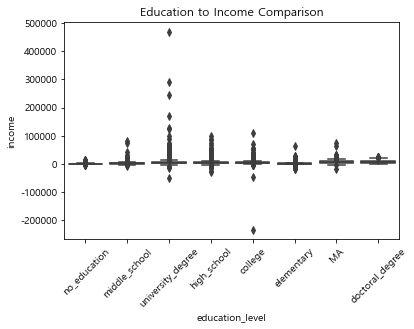

In [108]:
plt.figure()
sns.boxplot(data=wf, x='education_level', y='income')
plt.title('Education to Income Comparison')
plt.xticks(rotation=45)
plt.show()

In [109]:
wf.income.quantile([.002, .998])

0.002      -47.00
0.998    25293.83
Name: income, dtype: float64

In [110]:
wf = wf[(wf['income'] <= 25000) & (wf['income'] >= 0)]

이 데이터는 데이터 중 남성의 비율이 훨씬 높다. 또, 증감폭 또한 더 확연히 나타나는 걸 볼 수 있다.

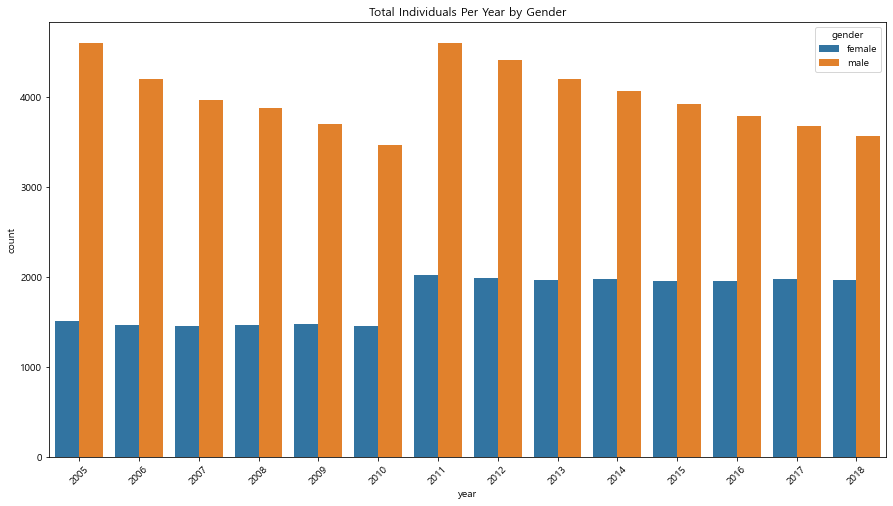

In [111]:
plt.figure(figsize = (15,8))
sns.countplot(data = wf, x='year', hue='gender')
plt.title('Total Individuals Per Year by Gender')
plt.xticks(rotation=45)
plt.show()

다음으로 2011년 복지조사에서 증가하는 원인이 되는 구체적인 집단이 있는지를 판단하기 위해 결혼에 따른 내역이 있는지를 확인하고 싶었습니다. 시각화에서는 증가의 대부분은 주로 18세 미만의 개인에 의해 일어난 것을 알 수 있습니다. 2011년에 출산율이 크게 높아졌을 수도 있지만 확인결과  이 때, 한국에서는 출산율이 감소했기 때문에 이런 추론은 불가능하다고 봅니다.

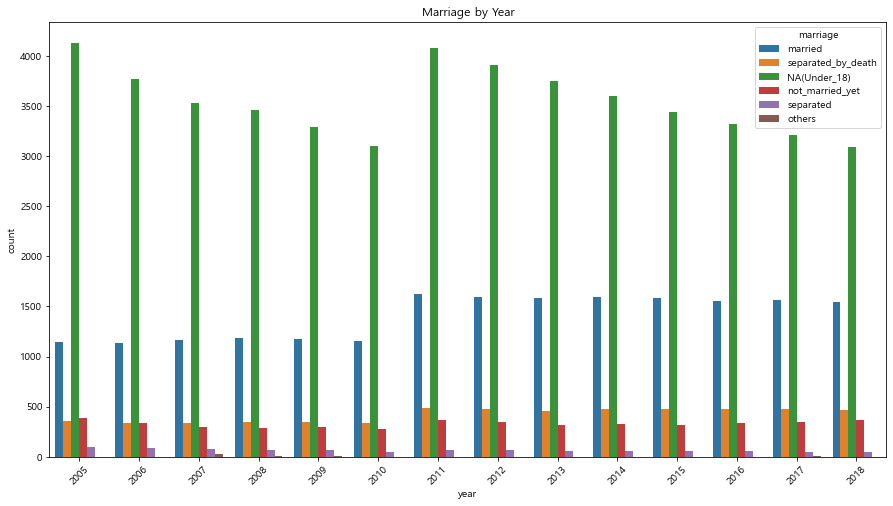

In [112]:
plt.figure(figsize = (15,8))
sns.countplot(data = wf, x='year', hue='marriage')
plt.title('Marriage by Year')
plt.xticks(rotation=45)
plt.show()

다음의 가시화에서는, 각 직종(Top 10)에 포함되는 개인의 수를 확인합니다. 조사에 따르면 청소부와 자동차 운전사는 대부분의 사람이 일하고 있는 카테고리입니다. 이들 카테고리의 평균 수입을 나타내는 시각화에서는 청소업자는 다른 모든 상위 직종 중 단연 최저의 보수를 받고 있음을 알 수 있습니다.

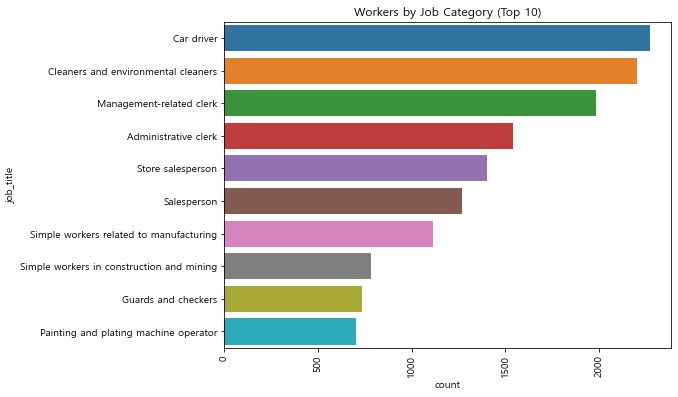

In [113]:
plt.figure(figsize = (8,6))
sns.countplot(data = wf, y='job_title', order=wf.job_title.value_counts().iloc[1:11].index)
plt.xticks(rotation=90)
plt.title('Workers by Job Category (Top 10)')
plt.show()

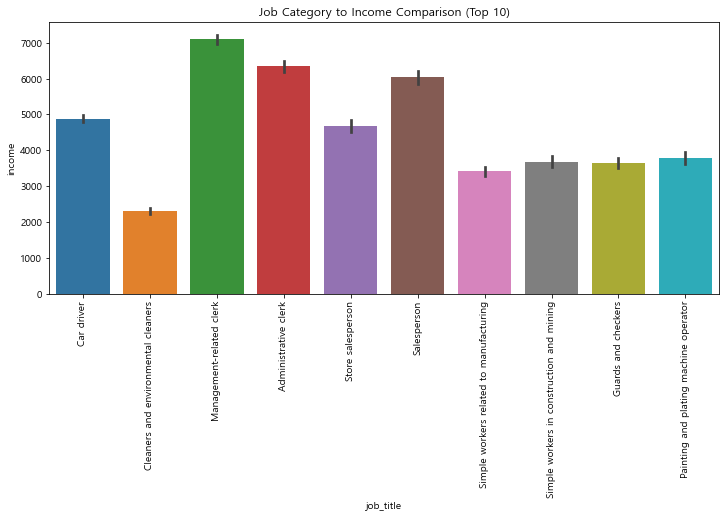

In [114]:
plt.figure(figsize=(12,5))
sns.barplot(data=wf, x='job_title', y='income', order=wf.job_title.value_counts().iloc[1:11].index)
plt.title('Job Category to Income Comparison (Top 10)')
plt.xticks(rotation=90)
plt.show()

여기서 잠깐! 우리 웹사이트의 주제는 it분야 취업사이트입니다. 따라서 다른 분야와 비교해서 it분야의 income을 시각화로 구현해보고 싶었습니다.
상위 income 직군에서 보이는 it 관련분야는 'Information system operator'와 'Computer Hardware and Communication Engineering'가 있군요.
각각 4위와 8위에 위치하는 걸 보실 수 있습니다.

In [115]:
wf[['job_title','income']]

,job_title,income
0,NaN,614.0
1,NaN,896.0
2,NaN,1310.0
3,NaN,2208.0
4,NaN,864.0
...,...,...
81041,Goods movement equipment operator,11600.0
81042,Goods movement equipment operator,8327.0
81043,Goods movement equipment operator,7931.0
81044,Goods movement equipment operator,8802.0


In [116]:
wf2 = wf.groupby('job_title').mean()[['income']]
wf2.reset_index(inplace=True)
wf2.sort_values(by='income',ascending=False,inplace=True)
wf2.iloc[:11,:]

,job_title,income
148,senior corporate executive,11562.730769
55,Insurance and Finance Manager,9868.437956
73,Medical professional,9800.221154
53,Information system operator,9169.439394
102,Power generation and distribution equipment op...,9021.187500
86,"Other construction, electricity and production...",8925.156571
144,jurist,8681.725490
19,Computer Hardware and Communication Engineerin...,8655.270588
31,"Electrical, electronic and mechanical engineer...",8594.538235
21,"Construction, electricity and production managers",8491.709238


In [117]:
#위 데이터프레임 csv로 뽑자!
#wf2.to_csv('Job_Category_to_Income_Comparison_(Top_10).csv')

PermissionError: [Errno 13] Permission denied: 'Job_Category_to_Income_Comparison_(Top_10).csv'

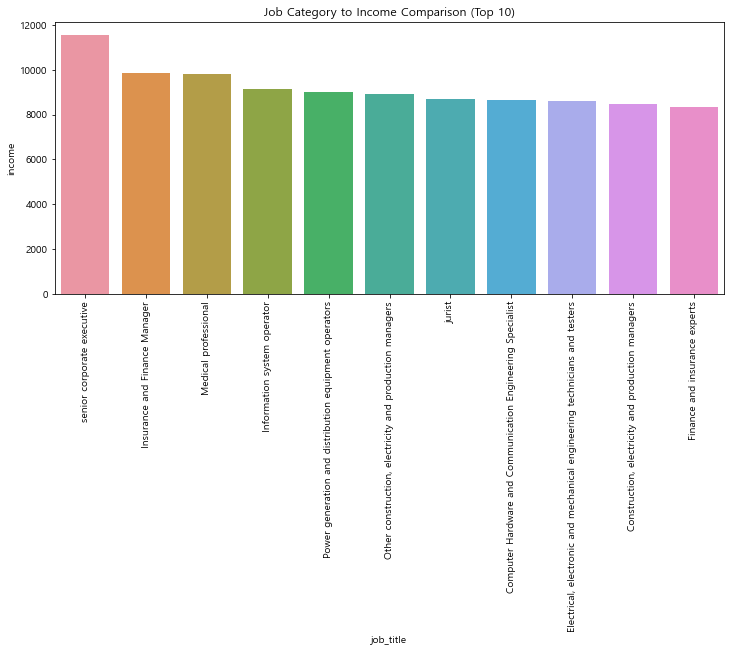

In [118]:
plt.figure(figsize=(12,5))
sns.barplot(data=wf2.iloc[:11,:], x='job_title', y='income')
plt.title('Job Category to Income Comparison (Top 10)')
plt.xticks(rotation=90)

#plt.axvspan(3.5,4.5, facecolor='gray')
plt.show()

자 그럼 계속해서!!
태어난 해를 쓰는 것보다 개인 나이를 보는 게 더 쉬울 것 같았어요. 다음은 컬럼을 추가하고 year_born을 삭제하는 코드를 보여드리겠습니다.

In [119]:
wf['age'] = [y-z for y, z in zip(wf['year'], wf['year_born'])]

In [120]:
wf=wf.drop('year_born', axis=1)

C:\Users\user\anaconda3\envs\jorldy\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


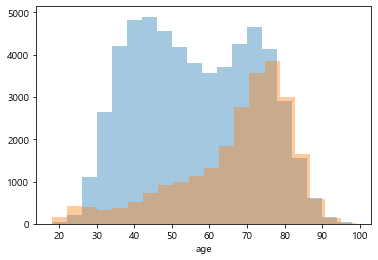

In [121]:
target_0 = wf.loc[wf['gender'] == 'male']
target_1 = wf.loc[wf['gender'] == 'female']

sns.distplot(target_0["age"], kde=False, bins = 20)
sns.distplot(target_1["age"], kde=False, bins = 20)
plt.show()

이번에는 직종 시각화와 마찬가지로 한국의 지역별 총소득과 평균소득을 보고 싶었습니다. 경기도는 개인이 가장 많은 반면 서울은 평균소득이 가장 높네요. 나는 그 데이터가 그 개인의 지역을 예측하는 데 도움이 되는지 조사하기로 결정했습니다.

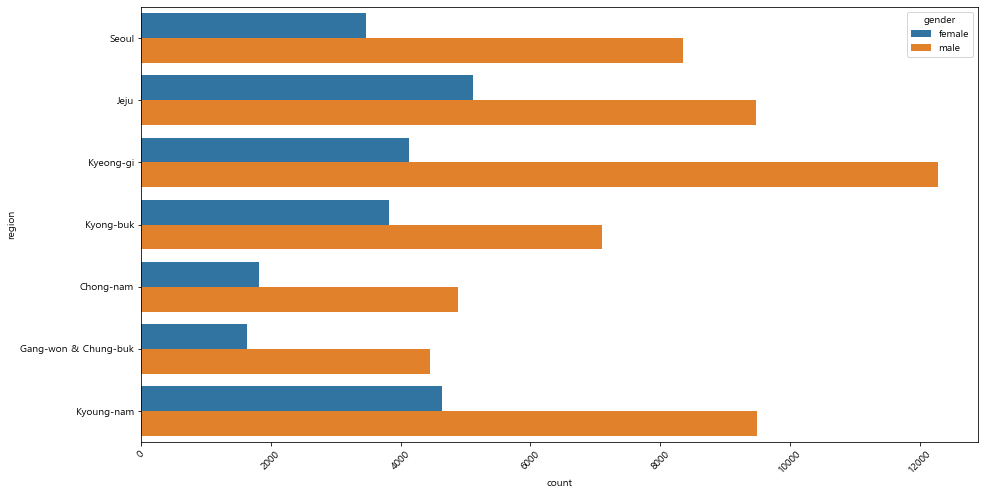

In [122]:
plt.figure(figsize = (15,8))
sns.countplot(data = wf, y='region', hue='gender')
plt.xticks(rotation=45)
plt.show()

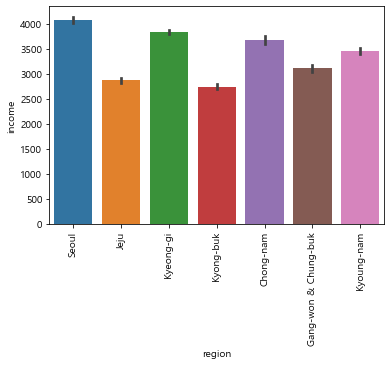

In [123]:
plt.figure()
sns.barplot(data=wf, x='region', y='income')
plt.xticks(rotation=90)
plt.show()

분류 모델을 통과하기 전에 0과 1보다 넓은 범위의 열 데이터를 정규화해야 합니다. 정규화가 필요한 컬럼은 연령, 수입, 회사규모 및 가족입니다.

In [124]:
from sklearn import preprocessing

x = np.array(wf['age']) #returns a numpy array
x = np.reshape(x,(-1,1))
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
wf['age'] = x_scaled

In [125]:
x = np.array(wf['income']) #returns a numpy array
x = np.reshape(x,(-1,1))
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
wf['income'] = x_scaled

In [126]:
wf.loc[wf['company_size'] == ' ', 'company_size'] = None

In [127]:
x = np.array(wf['company_size']) 
x = np.reshape(x,(-1,1))
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
wf['company_size'] = x_scaled

In [128]:
x = np.array(wf['family_member']) 
x = np.reshape(x,(-1,1))
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
wf['family_member'] = x_scaled

In [129]:
x = np.array(wf['year']) 
x = np.reshape(x,(-1,1))
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
wf['year'] = x_scaled

여기서 id와 wave는 식별자이고 wave는 나이와 동일한 정보를 제공할 뿐이므로 더 이상 도움이 되지 않기 때문에 id와 wave를 드롭하는 것을 선택했습니다. 또한 더미변수로 분해해보면 데이터셋에 컬럼이 너무 많기 때문에 회사사이즈가 직업변수와 결부되어 있기 때문에 회사 사이즈와 직업을 드롭하기로 했습니다.

In [130]:
df=wf[['region', 'income', 'age', 'year','family_member', 'gender', 'education_level', 'marriage', 'religion', 'reason_none_worker']]

문자열 형식의 변수를 포함하려면 더미 변수를 사용하여 변수를 분해해야 합니다.

In [131]:
for col in df.columns[5:]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

다음으로 데이터 셋을 열차와 테스트 변수로 분해했습니다. 간단히 하기 위해서, 저는 8:2 비율의 스플릿을 사용했습니다.

In [132]:
from sklearn.model_selection import train_test_split
target = df.iloc[:, 0:1].values.ravel()
data = df.iloc[:,1:len(df.columns)]

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2, random_state=5)

사용할 분류 모델은 Logistic Regression, Decision Tree Classifier 및 KNeighbors Classifier입니다.

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [134]:
model = LogisticRegression(multi_class="multinomial", max_iter=500)
model.fit(x_train, y_train)
pre = model.predict(x_test)

In [135]:
model = DecisionTreeClassifier()
model_dec = model.fit(x_train, y_train)
pre_dec = model.predict(x_test)

In [136]:
neigh = KNeighborsClassifier(n_neighbors = 7).fit(x_train,y_train)
pre_kn = neigh.predict(x_test)

이하에서는 어느 모델이 최적으로 동작하고 있는지를 판단하기 위해 분류 보고서를 실행했습니다. 이하에서는 KNeighbors가 가장 높은 정밀도의 F1 점수를 가지고 있는 것을 알 수 있습니다(다른 모델보다 약간 높을 뿐입니다).

In [137]:
from sklearn.metrics import classification_report
print('Logistic Regression')
print(classification_report(y_test, pre))
print('Decision Tree')
print(classification_report(y_test, pre_dec))
print('KN Neighbors')
print(classification_report(y_test, pre_kn))

Logistic Regression


C:\Users\user\anaconda3\envs\jorldy\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\jorldy\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\envs\jorldy\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

           Chong-nam       0.00      0.00      0.00      1285
Gang-won & Chung-buk       0.55      0.00      0.01      1228
                Jeju       0.27      0.36      0.30      2947
           Kyeong-gi       0.26      0.49      0.34      3357
           Kyong-buk       0.19      0.04      0.06      2113
          Kyoung-nam       0.24      0.32      0.27      2819
               Seoul       0.30      0.22      0.25      2393

            accuracy                           0.26     16142
           macro avg       0.26      0.20      0.18     16142
        weighted avg       0.26      0.26      0.22     16142

Decision Tree
                      precision    recall  f1-score   support

           Chong-nam       0.15      0.16      0.16      1285
Gang-won & Chung-buk       0.17      0.16      0.16      1228
                Jeju       0.29      0.29      0.29      2947
           Kyeong-gi       0.31      0.30      0.30 

이전 모델에서 neighbor 수는 7로 선택되었습니다. 그 다음 모델의 neighbor 수를 늘려서 정확도 점수를 올릴 수 있는지 여부를 확인합니다. 19명의 이웃이 있으면 정확도를 높일 수 있는데 1.5% 정도밖에 안 됩니다.

In [69]:
from sklearn import metrics
acc = {}
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    pre_kn = neigh.predict(x_test)
    acc[i] = metrics.accuracy_score(y_test, pre_kn)

In [70]:
print(acc)

{1: 0.2418535497460042, 2: 0.2341717259323504, 3: 0.2393135918721348, 4: 0.24742906703010778, 5: 0.2548630900755792, 6: 0.2574030479494486, 7: 0.25591624334035434, 8: 0.25839425102217817, 9: 0.26390781811423614, 10: 0.2642795192665097, 11: 0.2684301821335646, 12: 0.268987733861975, 13: 0.2697311361665221, 14: 0.271279890967662, 15: 0.2732003469210755, 16: 0.2755544542188081, 17: 0.2752447032585801, 18: 0.2746252013381241, 19: 0.2727047453847107}


In [71]:
import operator

max(acc, key=lambda key: acc[key])

16

예측값을 혼동 행렬의 실제 값과 비교하여 예측값이 불충분함을 알 수 있다.

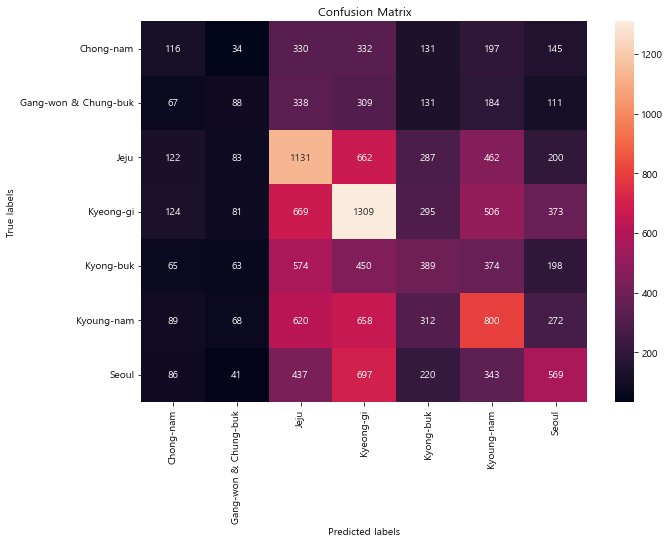

In [72]:
from sklearn.metrics import confusion_matrix 

final_cm = confusion_matrix(y_test, pre_kn)
knn_labels = neigh.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

결론

위 모델을 토대로 제가 선택한 정보는 사람의 출신지를 명확하게 예측하는 것이 아니었습니다. 직업이나 회사의 규모를 줄이지 않으면 모델이 개선되었을 수도 있지만, 지역에 관한 데이터가 비교적 균등하게 분포되어 있기 때문에 이것은 큰 도움이 되지 않았을 수도 있다고 생각합니다. 또한 분류를 위해서 향후 검토할 수 있는 다른 많은 영역 변수도 있습니다.